In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from tensorflow.keras.preprocessing import sequence

In [6]:
num_samples = 5000
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words = 5000)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [12]:
X_train = sequence.pad_sequences(X_train, maxlen = 400)
X_test = sequence.pad_sequences(X_test, maxlen = 400)

In [21]:
model = Sequential()
model.add(Embedding(5000,32,input_length = 400))
model.add(LSTM(128,activation='tanh',return_sequences = False))
model.add(Dense(1,activation= 'sigmoid'))

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(X_train,y_train, epochs = 5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 319ms/step - accuracy: 0.6755 - loss: 0.5830 - val_accuracy: 0.7766 - val_loss: 0.4679
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 304ms/step - accuracy: 0.8452 - loss: 0.3643 - val_accuracy: 0.8412 - val_loss: 0.3760
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 223s 357ms/step - accuracy: 0.8955 - loss: 0.2680 - val_accuracy: 0.8642 - val_loss: 0.3511
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 296s 474ms/step - accuracy: 0.9035 - loss: 0.2510 - val_accuracy: 0.8512 - val_loss: 0.3590
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 229s 325ms/step - accuracy: 0.9028 - loss: 0.2437 - val_accuracy: 0.8334 - val_loss: 0.4179


In [24]:
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)


782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step


In [ ]:
!pip install networkx

In [25]:
import networkx as nx

G = nx.Graph()

# Add nodes for sentiments
G.add_node('Positive')
G.add_node('Negative')

# Add a few review nodes and connect to sentiments
for i in range(300):  # limit to 300 for clean visualization
    review_node = f"Review {i}"
    G.add_node(review_node)
    
    sentiment = 'Positive' if y_pred_classes[i] == 1 else 'Negative'
    G.add_edge(review_node, sentiment)


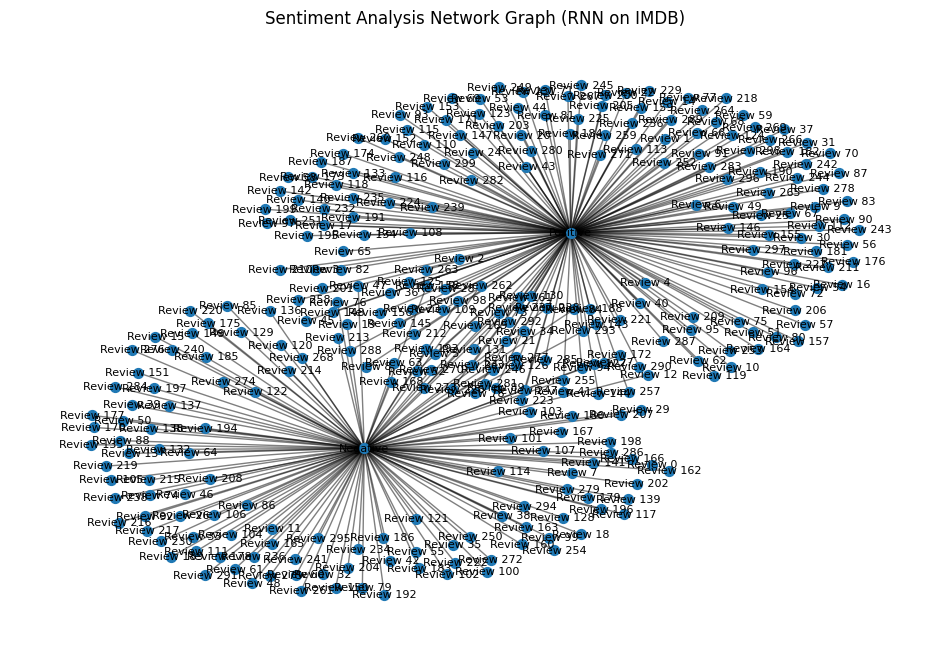

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)
# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Sentiment Analysis Network Graph (RNN on IMDB)")
plt.axis('off')
plt.show()
